In [1]:
from matminer.datasets.convenience_loaders import load_elastic_tensor
df = load_elastic_tensor()  # loads dataset in a pandas DataFrame object

In [2]:
unwanted_columns = ["volume", "nsites", "compliance_tensor", "elastic_tensor",
                    "elastic_tensor_original", "K_Voigt", "G_Voigt", "K_Reuss", "G_Reuss"]
df = df.drop(unwanted_columns, axis=1)

In [3]:
df

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682
...,...,...,...,...,...,...,...,...
1176,mp-9961,Ti2CdC,194,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",2.229538,53.329789,111.788114,0.294196
1177,mp-9969,ScSi,63,"[[0. 8.53417539 0.91740975] Sc, [0. ...",0.635889,70.253182,101.326807,0.218412
1178,mp-9972,YSi,63,"[[0. 9.084549 0.960921] Y, [0. 1.4...",0.454691,65.160458,89.418161,0.206850
1179,mp-998,Al2Cu,140,"[[5.11035838 2.07486738 0. ] Al, [3.996...",0.735449,40.211802,99.384565,0.321738


In [4]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

In [5]:
df

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)"
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)"
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)"
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga)
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)"
...,...,...,...,...,...,...,...,...,...
1176,mp-9961,Ti2CdC,194,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",2.229538,53.329789,111.788114,0.294196,"(Ti, Cd, C)"
1177,mp-9969,ScSi,63,"[[0. 8.53417539 0.91740975] Sc, [0. ...",0.635889,70.253182,101.326807,0.218412,"(Sc, Si)"
1178,mp-9972,YSi,63,"[[0. 9.084549 0.960921] Y, [0. 1.4...",0.454691,65.160458,89.418161,0.206850,"(Y, Si)"
1179,mp-998,Al2Cu,140,"[[5.11035838 2.07486738 0. ] Al, [3.996...",0.735449,40.211802,99.384565,0.321738,"(Al, Cu)"


In [6]:
from matminer.featurizers.composition import ElementProperty

In [7]:
ep_feat = ElementProperty.from_preset(preset_name="magpie")

In [8]:
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizerfrom matminer.featurizers.conversions import CompositionToOxidComposition

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

In [9]:
from matminer.featurizers.composition import OxidationStates

In [10]:
from matminer.featurizers.conversions import CompositionToOxidComposition

In [11]:
df = CompositionToOxidComposition().featurize_dataframe(df, "composition")

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

In [12]:
os_feat = OxidationStates()

In [13]:
df = os_feat.featurize_dataframe(df, "composition_oxid")

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

In [14]:
from matminer.featurizers.structure import DensityFeatures

In [15]:
df_feat = DensityFeatures()

In [16]:
df = df_feat.featurize_dataframe(df, "structure")  # input the structure column to the featurizer

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

In [17]:
df

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition,MagpieData minimum Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)",14.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)",13.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)",14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga),31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)",14.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,mp-9961,Ti2CdC,194,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",2.229538,53.329789,111.788114,0.294196,"(Ti, Cd, C)",6.0,...,0.000000,194.0,"(Ti0+, Cd0+, C0+)",0,0,0,0.000000,6.016734,15.190017,0.658712
1177,mp-9969,ScSi,63,"[[0. 8.53417539 0.91740975] Sc, [0. ...",0.635889,70.253182,101.326807,0.218412,"(Sc, Si)",14.0,...,16.500000,194.0,"(Sc0+, Si0+)",0,0,0,0.000000,3.336856,18.174013,0.625414
1178,mp-9972,YSi,63,"[[0. 9.084549 0.960921] Y, [0. 1.4...",0.454691,65.160458,89.418161,0.206850,"(Y, Si)",14.0,...,16.500000,194.0,"(Y0+, Si0+)",0,0,0,0.000000,4.462773,21.765469,0.689264
1179,mp-998,Al2Cu,140,"[[5.11035838 2.07486738 0. ] Al, [3.996...",0.735449,40.211802,99.384565,0.321738,"(Al, Cu)",13.0,...,0.000000,225.0,"(Al0+, Cu0+)",0,0,0,0.000000,4.356814,14.928982,0.595452


In [18]:
y = df['K_VRH'].values
excluded = ["G_VRH", "K_VRH", "elastic_anisotropy", "formula", "material_id",
            "poisson_ratio", "structure", "composition", "composition_oxid"]
X = df.drop(excluded, axis=1)
print("There are {} possible descriptors:\n\n{}".format(X.shape[1], X.columns.values))

There are 140 possible descriptors:

['space_group' 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'Magpi

In [19]:
X

,space_group,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,124,14.0,41.0,27.0,34.166667,9.111111,41.0,47.0,78.0,31.0,...,222.833333,9.611111,229.0,0,0,0,0.000000,7.834556,16.201654,0.688834
1,164,13.0,27.0,14.0,19.000000,6.400000,14.0,58.0,78.0,20.0,...,213.400000,15.520000,194.0,-4,3,7,3.872983,5.384968,12.397466,0.644386
2,221,14.0,76.0,62.0,45.000000,31.000000,14.0,57.0,78.0,21.0,...,210.500000,16.500000,194.0,-4,4,8,5.656854,13.968635,12.976265,0.569426
3,63,31.0,31.0,0.0,31.000000,0.000000,31.0,74.0,74.0,0.0,...,64.000000,0.000000,64.0,0,0,0,0.000000,6.036267,19.180359,0.479802
4,62,14.0,44.0,30.0,34.000000,13.333333,44.0,56.0,78.0,22.0,...,205.000000,14.666667,194.0,-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,194,6.0,48.0,42.0,24.500000,11.750000,22.0,43.0,77.0,34.0,...,194.000000,0.000000,194.0,0,0,0,0.000000,6.016734,15.190017,0.658712
1177,63,14.0,21.0,7.0,17.500000,3.500000,14.0,11.0,78.0,67.0,...,210.500000,16.500000,194.0,0,0,0,0.000000,3.336856,18.174013,0.625414
1178,63,14.0,39.0,25.0,26.500000,12.500000,14.0,12.0,78.0,66.0,...,210.500000,16.500000,194.0,0,0,0,0.000000,4.462773,21.765469,0.689264
1179,140,13.0,29.0,16.0,18.333333,7.111111,13.0,64.0,73.0,9.0,...,225.000000,0.000000,225.0,0,0,0,0.000000,4.356814,14.928982,0.595452


In [20]:
y

array([194.26888436, 175.44990675, 295.07754499, ...,  89.41816126,
        99.3845653 ,  35.93865993])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X, y)

LinearRegression()

In [24]:
print('training R2 = ' + str(round(lr.score(X, y), 3)))

training R2 = 0.927


In [25]:
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=lr.predict(X))))

training RMSE = 19.693


In [26]:
from sklearn.model_selection import KFold, cross_val_score

In [27]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

In [28]:
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)

In [29]:
rmse_scores = [np.sqrt(abs(s)) for s in scores]

In [30]:
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=crossvalidation, n_jobs=1)

In [31]:
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.902
Folds: 10, mean RMSE: 22.388


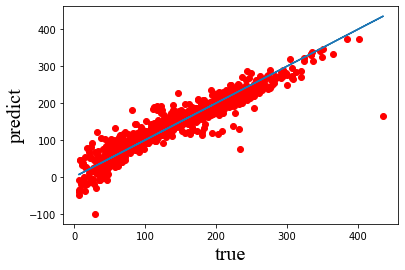

In [35]:
import matplotlib.pyplot as plt

plt.plot(y, y, label='Real Data')
plt.scatter(y, cross_val_predict(lr, X, y, cv=crossvalidation), label='Predict', c='r')
plt.xlabel("true", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("predict", fontproperties = 'Times New Roman', size = 20)
plt.savefig('1.tif', dpi=300, bbox_inches = 'tight')
plt.show()

# from figrecipes import PlotlyFig
# from sklearn.model_selection import cross_val_predict
 
# pf = PlotlyFig(x_title='DFT (MP) bulk modulus (GPa)',
#                y_title='Predicted bulk modulus (GPa)',
#                title='Linear regression',
#                mode='notebook',
#                filename="lr_regression.html")
 
# pf.xy(xy_pairs=[(y, cross_val_predict(lr, X, y, cv=crossvalidation)), ([0, 400], [0, 400])],
#       labels=df['formula'],
#       modes=['markers', 'lines'],
#       lines=[{}, {'color': 'black', 'dash': 'dash'}],
#       showlegends=False
#      )